In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
columns = ['chk_acct', 'duration', 'credit_his', 'purpose', 'amount', 'saving_acct', 'present_emp', 'installment_rate', 'sex',
                'other_debtor', 'present_resid', 'property', 'age', 'other_install', 'housing', 'n_credits', 'job', 'n_people', 
                'telephone', 'foreign', 'response']

In [3]:
df = pd.read_csv('./german.csv', usecols=[i for i in range(22) if i!=0], names=columns, header=0)
df.head()

,chk_acct,duration,credit_his,purpose,amount,saving_acct,present_emp,installment_rate,sex,other_debtor,present_resid,property,age,other_install,housing,n_credits,job,n_people,telephone,foreign,response
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,good,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,good,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,bad,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,bad,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,bad,A191,A201,2


In [4]:
df.shape

(1000, 21)

In [5]:
df['response'] = df['response'].apply(lambda x: x-1)

In [6]:
df.head()

,chk_acct,duration,credit_his,purpose,amount,saving_acct,present_emp,installment_rate,sex,other_debtor,present_resid,property,age,other_install,housing,n_credits,job,n_people,telephone,foreign,response
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,good,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,good,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,bad,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,bad,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,bad,A191,A201,1


In [7]:
df.describe()

,duration,amount,installment_rate,present_resid,age,n_credits,response
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,0.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,1.000000


In [8]:
df.dtypes

chk_acct            object
duration             int64
credit_his          object
purpose             object
amount               int64
saving_acct         object
present_emp         object
installment_rate     int64
sex                 object
other_debtor        object
present_resid        int64
property            object
age                  int64
other_install       object
housing             object
n_credits            int64
job                 object
n_people            object
telephone           object
foreign             object
response             int64
dtype: object

<AxesSubplot:>

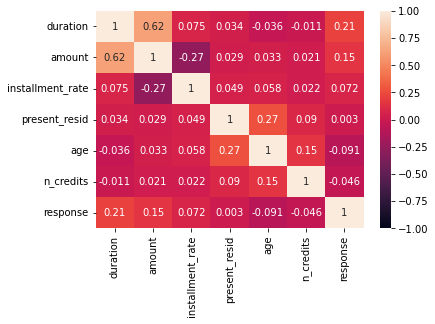

In [9]:
sns.heatmap(data=df.corr(), annot=True, vmin=-1, vmax=1)

In [10]:
df.installment_rate.unique()

array([4, 2, 3, 1], dtype=int64)

In [11]:
len(df)

1000

<AxesSubplot:xlabel='installment_rate', ylabel='count'>

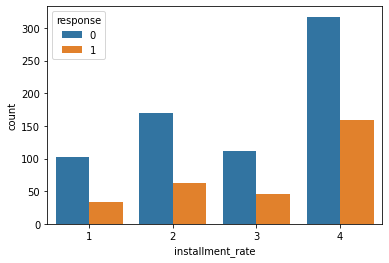

In [12]:
sns.countplot(x='installment_rate', data=df, hue='response', )

<AxesSubplot:xlabel='response', ylabel='age'>

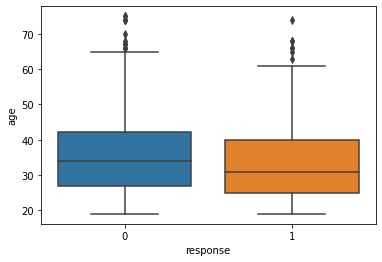

In [13]:
sns.boxplot(x='response', y='age', data=df)

<AxesSubplot:xlabel='response', ylabel='duration'>

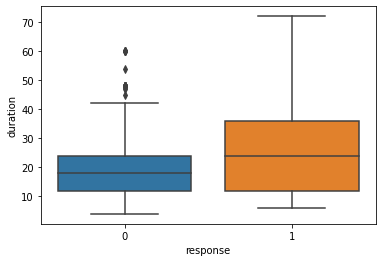

In [14]:
sns.boxplot(x='response', y='duration', data=df)

<AxesSubplot:xlabel='chk_acct', ylabel='count'>

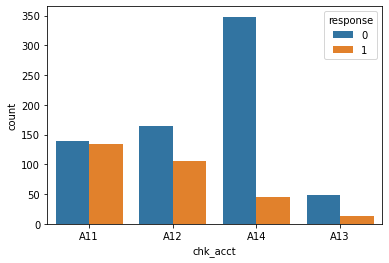

In [15]:
sns.countplot(x='chk_acct', data=df, hue='response')

<AxesSubplot:xlabel='credit_his', ylabel='count'>

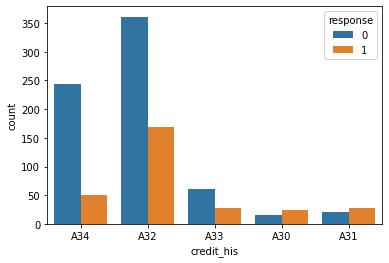

In [16]:
sns.countplot(x='credit_his', data=df, hue='response')

<AxesSubplot:xlabel='saving_acct', ylabel='count'>

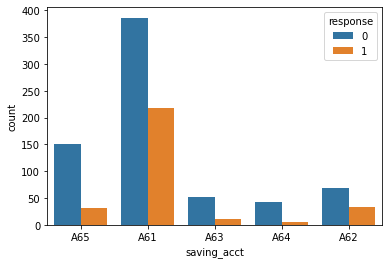

In [17]:
sns.countplot(x='saving_acct', data=df, hue='response')

In [18]:
from sklearn.model_selection import train_test_split
X = df[['sex', 'housing', 'saving_acct', 'chk_acct', 'age', 'duration', 'amount']]
y = df.iloc[:,-1]

In [19]:
X = pd.get_dummies(X, drop_first=True)

In [20]:
X.head()

,age,duration,amount,sex_A92,sex_A93,sex_A94,housing_A152,housing_A153,saving_acct_A62,saving_acct_A63,saving_acct_A64,saving_acct_A65,chk_acct_A12,chk_acct_A13,chk_acct_A14
0,67,6,1169,0,1,0,1,0,0,0,0,1,0,0,0
1,22,48,5951,1,0,0,1,0,0,0,0,0,1,0,0
2,49,12,2096,0,1,0,1,0,0,0,0,0,0,0,1
3,45,42,7882,0,1,0,0,1,0,0,0,0,0,0,0
4,53,24,4870,0,1,0,0,1,0,0,0,0,0,0,0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_numpy = scaler.fit_transform(X_train.iloc[:, 0:3])
X_test_numpy = scaler.transform(X_test.iloc[:, 0:3])

X_train_numpy_df = pd.DataFrame(X_train_numpy, columns=X_train.columns[:3], index=X_train.index)
X_test_numpy_df = pd.DataFrame(X_test_numpy, columns=X_test.columns[:3], index=X_test.index)

X_train = pd.concat([X_train_numpy_df, X_train.iloc[:, 3:]], axis=1)
X_test = pd.concat([X_test_numpy_df, X_test.iloc[:, 3:]], axis=1)

In [23]:
X_train.head()

,age,duration,amount,sex_A92,sex_A93,sex_A94,housing_A152,housing_A153,saving_acct_A62,saving_acct_A63,saving_acct_A64,saving_acct_A65,chk_acct_A12,chk_acct_A13,chk_acct_A14
687,-0.508707,1.266142,-0.133708,0,1,0,0,1,1,0,0,0,1,0,0
500,-0.767043,0.270242,-0.041477,1,0,0,1,0,0,0,0,0,0,0,0
332,-1.025380,3.257942,1.472742,1,0,0,1,0,1,0,0,0,1,0,0
979,-0.939268,-0.476683,-0.698405,0,0,1,0,0,1,0,0,0,1,0,0
817,-1.025380,-1.223608,-0.595925,1,0,0,0,0,0,0,0,0,0,0,1


In [24]:
X_test.head()

,age,duration,amount,sex_A92,sex_A93,sex_A94,housing_A152,housing_A153,saving_acct_A62,saving_acct_A63,saving_acct_A64,saving_acct_A65,chk_acct_A12,chk_acct_A13,chk_acct_A14
993,-0.508707,1.266142,0.253946,0,1,0,1,0,0,0,0,0,0,0,0
859,-0.853156,-0.974633,0.118956,0,1,0,0,0,1,0,0,0,0,0,1
298,0.610750,-0.227708,-0.256330,0,1,0,1,0,0,0,0,0,0,0,1
553,-0.767043,-0.725658,-0.440086,0,1,0,1,0,1,0,0,0,1,0,0
672,0.524638,3.257942,2.518031,0,1,0,1,0,0,0,0,0,0,0,1


In [25]:
y_train

687    0
500    1
332    1
979    1
817    0
      ..
835    1
192    1
629    0
559    1
684    0
Name: response, Length: 800, dtype: int64

In [26]:
y_test

993    0
859    0
298    0
553    0
672    0
      ..
679    0
722    1
215    0
653    1
150    0
Name: response, Length: 200, dtype: int64

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc, roc_curve, classification_report, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

In [33]:
params = {
    'logistic_regression': {
        'model' : LogisticRegression(),
        'params' : {
            'solver' : ['lbfgs', 'liblinear'],
            'C' : [0.01, 0.1, 1, 10, 100]
        }
    },
        
     'decision_tree_classifier' : {
         'model' : DecisionTreeClassifier(),
         'params' : {
             'max_depth' : [1, 10, 100, 1000]
         }
     },
         
     'random_forest_classifier' : {
         'model' : RandomForestClassifier(),
         'params' : {
             'n_estimators' : [1, 5, 10, 100, 1000, 5000, 10000]
         }
     }
}

In [34]:
scores = []
for model_name, params in params.items():
    gscv = GridSearchCV(params['model'], params['params'], cv=5, return_train_score=False)
    gscv.fit(X_train, y_train)
    scores.append({
        'model' : model_name,
        'best_params' : gscv.best_params_,
        'best_score' : gscv.best_score_
    })
df2 = pd.DataFrame(scores, columns=['model', 'best_params', 'best_score'])

In [35]:
df2.head()

,model,best_params,best_score
0,logistic_regression,"{'C': 0.1, 'solver': 'lbfgs'}",0.7300
1,decision_tree_classifier,{'max_depth': 1},0.6975
2,random_forest_classifier,{'n_estimators': 100},0.7300


In [38]:
logis = LogisticRegression(solver='lbfgs', C=0.1)
logis.fit(X_train, y_train)
print(logis.score(X_test, y_test))
print(logis.score(X_train, y_train))

0.725
0.7425


In [40]:
print(classification_report(y_test, logis.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       142
           1       0.54      0.33      0.41        58

    accuracy                           0.73       200
   macro avg       0.65      0.61      0.61       200
weighted avg       0.70      0.72      0.70       200



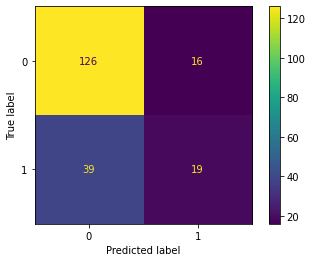

In [45]:
plot_confusion_matrix(logis, X_test, y_test)

In [46]:
!pip install joblib

In [47]:
import joblib
joblib.dump(logis, 'LogisticRegressionModel.pkl')

['LogisticRegressionModel.pkl']